In [1]:
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd

df = pd.read_csv ("breast-cancer-wisconsin.data.txt")
df.replace("?", -99999, inplace=True)
df.head()

,ID,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
df.drop (['ID'], 1, inplace=True)
df.head()


,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [3]:
X = np.array (df.drop(["class"], 1))
y = np.array (df["class"])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [4]:
clf=neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print (accuracy)

0.978571428571


In [5]:
example_measures = np.array ([[4, 2, 1, 1, 1, 2, 3, 2, 1], [4, 2, 1, 1, 1, 2, 3, 2, 1]])
example_measures = example_measures.reshape (len(example_measures), -1)
prediction = clf.predict(example_measures)

print (prediction)

[2 2]


In [6]:
from math import sqrt
plot1=[1, 3]
plot2=[2, 5]
euclidean_distance=sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2)
print (euclidean_distance)

#or using array to do the math, it's easier
a=np.array([1, 3])
b=np.array([2, 5])
c=np.sqrt(np.sum((a-b)**2))
print (c)

2.23606797749979
2.2360679775


In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings
style.use("fivethirtyeight")

dataset = {"k" : [[1, 2], [2, 3], [3, 1]], "r": [[6, 5], [7, 7], [8, 6]]}
new_features = [5, 7]

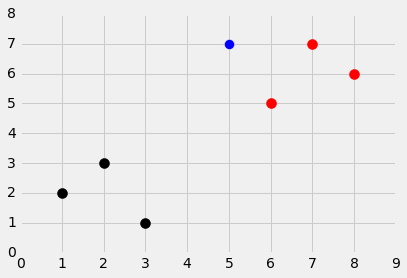

In [8]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)
plt.show()

In [9]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn ("K is set to a value less than total voting groups!")
    distance=[]
    for group in data:
        for features in data[group]:
            euclidean_distance=np.linalg.norm(np.array(features)-np.array(predict))
            #the above line means c=np.sqrt(np.sum((a-b)**2)) 
            #np.linalg.norm(x - y, ord=2) (or just np.linalg.norm(x - y)) 
            #will give you Euclidean distance between the vectors x and y.
            distance.append([euclidean_distance, group])
    #print (distance)
    votes = [i[1] for i in sorted(distance)[:k]]
    #print (votes)
    #print (Counter(votes).most_common)
    #print (Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence= Counter(votes).most_common (1)[0][1] /k
            
    return vote_result, confidence
result = k_nearest_neighbors(dataset, new_features, k=3)
print (result)

('r', 1.0)


In [10]:
import random
df = pd.read_csv("breast-cancer-wisconsin.data.txt")
df.replace("?", -99999, inplace=True)#inplace : boolean, default False Modify the DataFrame in place (do not create a new object)
df.drop(["ID"], 1, inplace=True)
print (df.head())

   clump_thickness  unif_cell_size  unif_cell_shape  marg_adhesion  \
0                5               1                1              1   
1                5               4                4              5   
2                3               1                1              1   
3                6               8                8              1   
4                4               1                1              3   

   single_epith_cell_size bare_nuclei  bland_chrom  norm_nucleoli  mitoses  \
0                       2           1            3              1        1   
1                       7          10            3              2        1   
2                       2           2            3              1        1   
3                       3           4            3              7        1   
4                       2           1            3              1        1   

   class  
0      2  
1      2  
2      2  
3      2  
4      2  


In [11]:
#df.bare_nuclei=df.bare_nuclei.astype(float)
full_data=df.astype(float).values.tolist()
print (full_data[:10])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0], [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [13]:
random.shuffle(full_data)
test_size = 0.2
train_set={2:[], 4:[]}#2 and 4 are labels: class column in the cancer dataset
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]
                             
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])
#print (train_set)

correct=0
total=0
for group in test_set:
    for data in test_set[group]:
        vote, confidence=k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct +=1
        else:
            print (confidence)
        total+=1
print ("Accuracy", correct/total)
                           

1.0
0.8
0.6
Accuracy 0.9784172661870504
